In [10]:
# ==========================
# Mount Google Drive
# ==========================
from google.colab import drive
import os

drive.mount('/content/drive')

# ==========================
# Set Base Path
# ==========================
base_path = "/content/drive/MyDrive/Healthcare_EDA_Projects"

# Project name
project_name = "Ecommerce_Delivery_Analytics"

# Full path for this project
project_path = os.path.join(base_path, project_name)

# Folder paths
raw_path = os.path.join(project_path, "data", "raw")
processed_path = os.path.join(project_path, "data", "processed")
notebooks_path = os.path.join(project_path, "notebooks")
reports_path = os.path.join(project_path, "reports")
figures_path = os.path.join(reports_path, "figures")

# ==========================
# Create Folders
# ==========================
folders = [raw_path, processed_path, notebooks_path, reports_path, figures_path]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ==========================
# Create Empty Files
# ==========================
files = [
    os.path.join(reports_path, "README.md"),
    os.path.join(project_path, "requirements.txt"),
    os.path.join(project_path, "LICENSE"),
    os.path.join(project_path, ".gitignore"),
    os.path.join(project_path, "README.md")
]
for file in files:
    open(file, 'a').close()

print(f"✅ Project structure created at: {project_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Project structure created at: /content/drive/MyDrive/Healthcare_EDA_Projects/Ecommerce_Delivery_Analytics


In [3]:
# =============================================
# 📌 Project: Ecommerce_Delivery_Analytics EDA
# =============================================

In [11]:
# ========================
# Setup & Imports
# ========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")

In [12]:
# ========================
# Load Dataset
# ========================
# Upload manually
from google.colab import files
uploaded = files.upload()  # Upload Ecommerce_Delivery_Analytics.csv here

# Save raw data
df_raw = pd.read_csv("Ecommerce_Delivery_Analytics.csv")
df_raw.to_csv(os.path.join(raw_path, "Ecommerce_Delivery_Analytics.csv"), index=False)  # Save to Drive

print("\n--- First 5 rows ---\n")
print(df_raw.head())

Saving Ecommerce_Delivery_Analytics.csv to Ecommerce_Delivery_Analytics (2).csv

--- First 5 rows ---

    Order ID Customer ID Platform Order Date & Time  Delivery Time (Minutes)  \
0  ORD000001    CUST2824  JioMart           19:29.5                       30   
1  ORD000002    CUST1409  Blinkit           54:29.5                       16   
2  ORD000003    CUST5506  JioMart           21:29.5                       25   
3  ORD000004    CUST5012  JioMart           19:29.5                       42   
4  ORD000005    CUST4657  Blinkit           49:29.5                       30   

      Product Category  Order Value (INR)              Customer Feedback  \
0  Fruits & Vegetables                382  Fast delivery, great service!   
1                Dairy                279            Quick and reliable!   
2            Beverages                599      Items missing from order.   
3            Beverages                946      Items missing from order.   
4            Beverages              

In [13]:
# ========================
# Basic Info & Summary
# ========================
print("\n--- Dataset Info ---\n")
df_raw.info()
print("\n--- Summary Stats ---\n")
print(df_raw.describe())


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB

--- Summary Stats ---

       Delivery Time (Minutes)  Order Value (INR)  Service Rating
count            100000.0

In [14]:
# ===============================
# Data Cleaning and Preprocessing
# ===============================

# Create a copy of the dataframe for processing
df_processed = df_raw.copy()

# Convert 'Order Date & Time' to datetime, inferring the date type
df_processed['Order Date & Time'] = pd.to_datetime(df_processed['Order Date & Time'], errors='coerce')

# Check for missing datetime conversions and report if any
missing_dates = df_processed['Order Date & Time'].isnull().sum()
if missing_dates > 0:
    print(f"Warning: {missing_dates} rows have invalid date formats and have been set as NaT.")

# Example: handling missing values - here we simply drop rows with missing date info
df_processed = df_processed.dropna(subset=['Order Date & Time'])

# For categorical columns, ensuring consistency by stripping spaces
categorical_columns = ['Order ID', 'Customer ID', 'Platform', 'Product Category', 'Customer Feedback', 'Delivery Delay', 'Refund Requested']
for col in categorical_columns:
    df_processed[col] = df_processed[col].astype(str).str.strip()

# Quick summary of our cleaned data
print(df_processed.info())

# Save processed data to Drive
df_processed.to_csv(os.path.join(processed_path, "Ecommerce_Delivery_Analytics_processed.csv"), index=False)

print(f"✅ Processed data saved to: {os.path.join(processed_path, 'Ecommerce_Delivery_Analytics_processed.csv')}")

<class 'pandas.core.frame.DataFrame'>
Index: 39911 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order ID                 39911 non-null  object        
 1   Customer ID              39911 non-null  object        
 2   Platform                 39911 non-null  object        
 3   Order Date & Time        39911 non-null  datetime64[ns]
 4   Delivery Time (Minutes)  39911 non-null  int64         
 5   Product Category         39911 non-null  object        
 6   Order Value (INR)        39911 non-null  int64         
 7   Customer Feedback        39911 non-null  object        
 8   Service Rating           39911 non-null  int64         
 9   Delivery Delay           39911 non-null  object        
 10  Refund Requested         39911 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 3.7+ MB
None
✅ Processed data saved to: /c

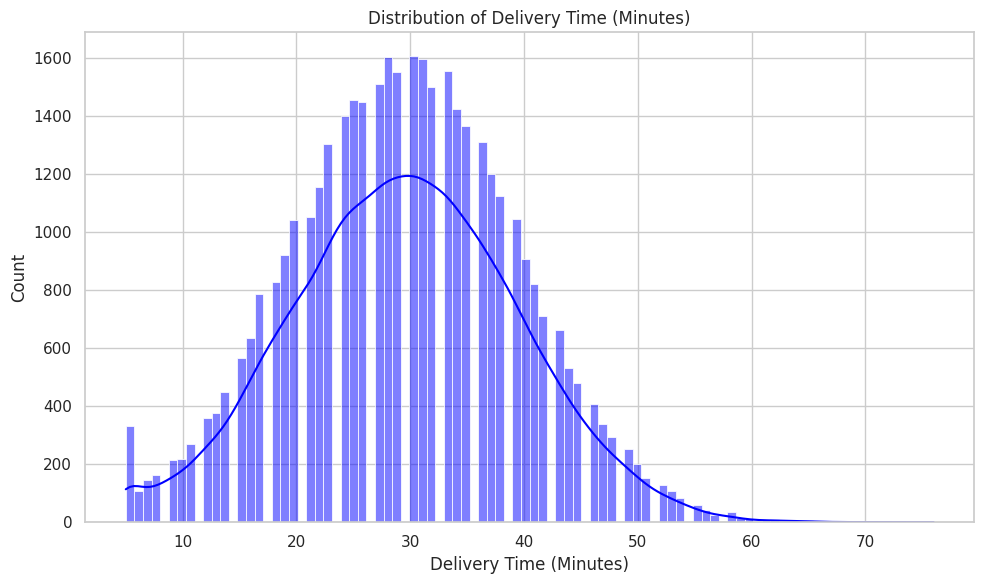

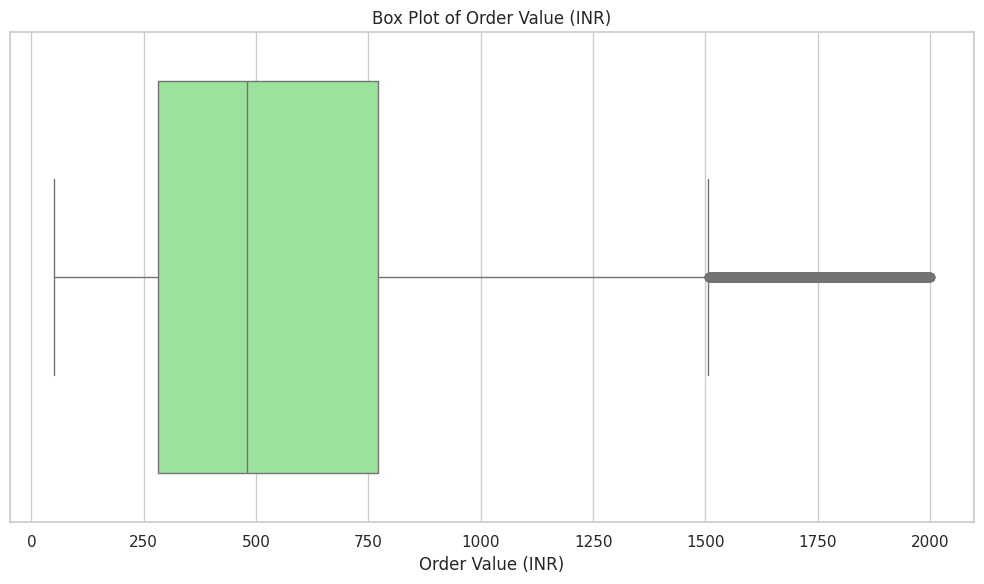

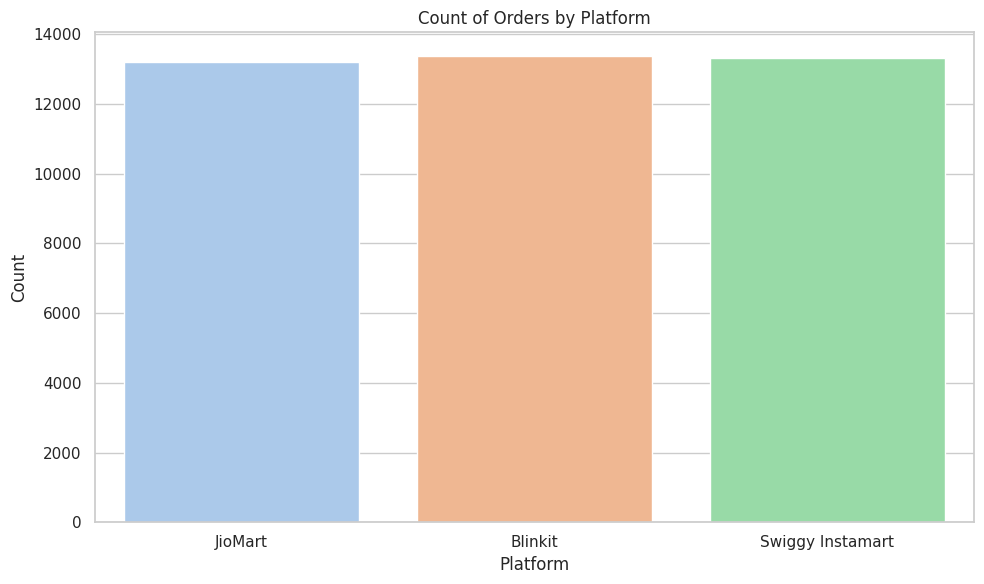

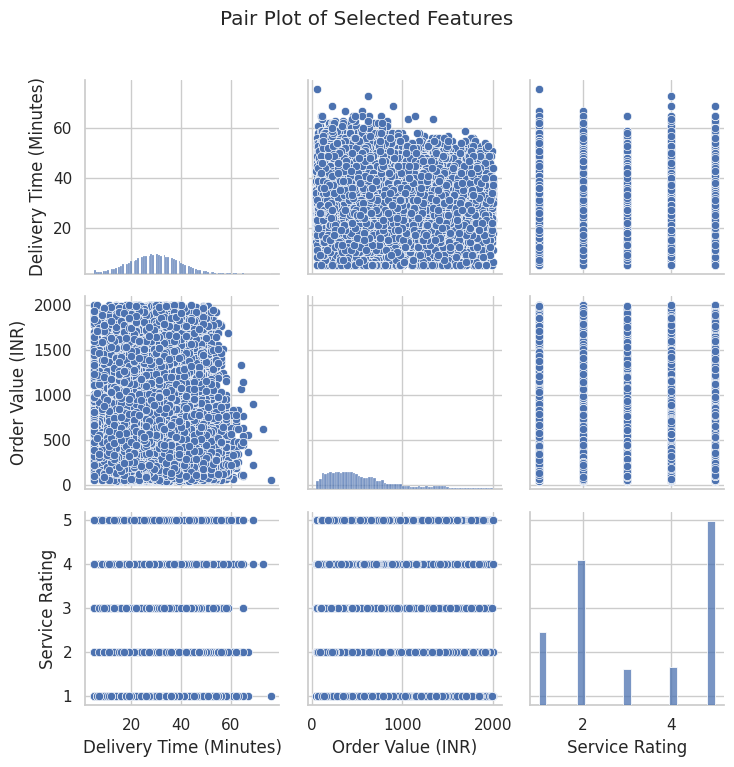

In [16]:
# ================
#  Visualizations
# ================

# Histogram for 'Delivery Time (Minutes)'
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['Delivery Time (Minutes)'], kde=True, color='blue')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Count')
plt.savefig(os.path.join(figures_path, "Distribution of Delivery Time (Minutes).png"))
plt.tight_layout()
plt.show()
plt.close()

# Box Plot for 'Order Value (INR)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_processed['Order Value (INR)'], color='lightgreen')
plt.title('Box Plot of Order Value (INR)')
plt.xlabel('Order Value (INR)')
plt.savefig(os.path.join(figures_path, "Box Plot of Order Value (INR).png"))
plt.tight_layout()
plt.show()
plt.close()

# Count Plot (Pie Chart alternative) for 'Platform'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='Platform', palette='pastel')
plt.title('Count of Orders by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.savefig(os.path.join(figures_path, "Count of Orders by Platform.png"))
plt.tight_layout()
plt.show()
plt.close()


# If there are enough numeric columns, generate a correlation heatmap
numeric_df = df_processed.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.savefig(os.path.join(figures_path, "Correlation Heatmap of Numeric Features.png"))
    plt.tight_layout()
    plt.show()
    plt.close()


# Pair Plot for a subset of features
cols_for_pairplot = ['Delivery Time (Minutes)', 'Order Value (INR)', 'Service Rating']
if set(cols_for_pairplot).issubset(df_processed.columns):
    sns.pairplot(df_processed[cols_for_pairplot].dropna())
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.savefig(os.path.join(figures_path, "Pair Plot of Selected Features.png"))
    plt.tight_layout()
    plt.show()
    plt.close()